<a href="https://colab.research.google.com/github/Mahdi-Miri/VectorizeWithPython/blob/main/Vectorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
text = """A major drawback of statistical methods is that they require elaborate feature engineering.
Since the early 2010s, the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning.
Popular techniques include the use of word embeddings to capture semantic properties of words, and an increase in end-to-end learning of a higher-level task (e.g., question answering) instead of relying on a pipeline of separate intermediate tasks (e.g., part-of-speech tagging and dependency parsing).
In some areas, this shift has entailed substantial changes in how NLP systems are designed, such that deep neural network-based approaches may be viewed as a new paradigm distinct from statistical natural language processing.
For instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directly learn sequence-to-sequence transformations, obviating the need for intermediate steps such as word alignment and language modeling that was used in statistical machine translation (SMT).
Latest works tend to use non-technical structure of a given task to build proper neural network"""

In [24]:
text

'A major drawback of statistical methods is that they require elaborate feature engineering. \nSince the early 2010s, the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning. \nPopular techniques include the use of word embeddings to capture semantic properties of words, and an increase in end-to-end learning of a higher-level task (e.g., question answering) instead of relying on a pipeline of separate intermediate tasks (e.g., part-of-speech tagging and dependency parsing).\nIn some areas, this shift has entailed substantial changes in how NLP systems are designed, such that deep neural network-based approaches may be viewed as a new paradigm distinct from statistical natural language processing. \nFor instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directly learn sequence-to-sequence transformations, obviating the need for intermediate steps such as 

# Cleaning Data

In [25]:
sentences = sent_tokenize(text)

In [26]:
sentences

['A major drawback of statistical methods is that they require elaborate feature engineering.',
 'Since the early 2010s, the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning.',
 'Popular techniques include the use of word embeddings to capture semantic properties of words, and an increase in end-to-end learning of a higher-level task (e.g., question answering) instead of relying on a pipeline of separate intermediate tasks (e.g., part-of-speech tagging and dependency parsing).',
 'In some areas, this shift has entailed substantial changes in how NLP systems are designed, such that deep neural network-based approaches may be viewed as a new paradigm distinct from statistical natural language processing.',
 'For instance, the term neural machine translation (NMT) emphasizes the fact that deep learning-based approaches to machine translation directly learn sequence-to-sequence transformations, obviating the need for intermediate step

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
stemmer = PorterStemmer()

In [53]:
Final_Sentences = []
for sent in sentences:
  review = re.sub("[a-zA-Z]" , " " , sent)
  review = re.sub("\b[a-zA-Z]\b", " " , sent)
  review = review.lower()
  review = review.split()
  review = [stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = " ".join(review)
  Final_Sentences.append(review)

# vectorization

In [57]:
!pip install -U scikit-learn
import sklearn

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer()

In [65]:
cv

CountVectorizer()

In [68]:
BoW = cv.fit_transform(Final_Sentences).toarray()

In [69]:
BoW

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [70]:
import matplotlib.pyplot as plt
import numpy as np

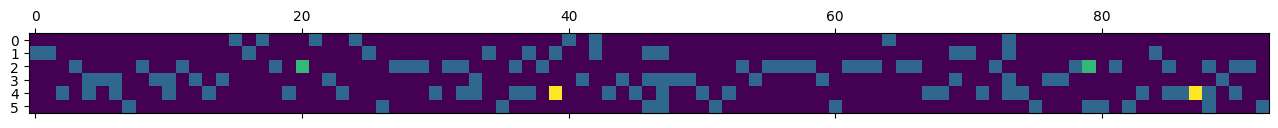

In [75]:
import pylab as p
p.matshow(BoW)
p.show()

In [75]:
|